In [47]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import ttest_ind, mannwhitneyu
import warnings
warnings.filterwarnings('ignore')

In [56]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  # Show full column names

In [24]:
df = pd.read_csv('Cleaned_hostel_dataset.csv')

In [57]:
df.head()

,gender,year_study,current_stay,preference,pref_reasons,pref_afford,pref_proximity,pref_social,pref_amenities,pref_security,change_accommodation,satisfaction,prefer_closer,distance_affects_attendance,commute_mode,commute_walk,commute_bike,commute_bus,commute_taxi,proximity_focus,funding_source,changed_before,less_pref_due_cost,amenities_list,amenity_water,amenity_electricity,amenity_internet,amenity_laundry,amenity_aircon,amenity_cleanbath,issues_basic_services,water_supply,electricity_supply,internet_access,room_cleanliness,bathroom_facility,hostel_management,study_space_conducive,env_collaboration,social_influence,rating,security_personnel,security_cctv,security_fencing,security_checkin,security_none,experienced_theft,security_confidence,focus_feeling,mental_health,consistent_study_routine,study_elsewhere,study_hours,distance_affects_attendance_num_temp,consistent_study_routine_num_temp,study_elsewhere_num_temp,study_space_conducive_num_temp
0,Male,4,Off-Campus,Off-campus hostel,"Affordability Proximity to lecture halls Availability of amenities (Wi-Fi, water, etc.)",1,1,0,1,0,No,5,No,Not at all,Walking,1,0,0,0,3,Parents/Guardians,Yes,No,Water Electricity Internet Air conditioning/Fans Clean bathroom Facilities,1,1,1,0,1,1,Rarely,4,5,3,4,4,5,Yes,4,No,4,0,1,1,0,0,No,Very good,4,4,Yes,Yes,5,NaN,1.0,1.0,1.0
1,Male,4,Off-Campus,On-campus hostel,"Proximity to lecture halls Access to social life Availability of amenities (Wi-Fi, water, etc.) Security",0,1,1,1,1,Yes,3,No,Sometimes,Walking,1,0,0,0,4,Parents/Guardians,No,Yes,Water Electricity Internet Air conditioning/Fans Clean bathroom Facilities,1,1,1,0,1,1,Occasionally,4,3,2,3,2,3,No,2,Yes,4,0,0,1,0,0,Yes,Poor,3,3,Sometimes,Yes,3,NaN,NaN,1.0,0.0
2,Female,4,Off-Campus,Off-campus hostel,Affordability Access to social life,1,0,1,0,0,No,5,No,Sometimes,Walking,1,0,0,0,3,Parents/Guardians,Yes,No,Water Electricity Internet Clean bathroom Facilities,1,1,1,0,0,1,Rarely,4,5,3,5,5,4,Not available foruse,3,No,4,0,0,1,0,0,No,Excellent,5,4,Yes,No,3,NaN,1.0,0.0,NaN
3,Male,4,Off-Campus,Off-campus hostel,"Affordability Proximity to lecture halls Access to social life Availability of amenities (Wi-Fi, water, etc.) Security",1,1,1,1,1,Maybe,3,No,Not at all,Walking Shuttle/Bus,1,0,1,0,4,Parents/Guardians,Yes,No,Water Electricity Internet Clean bathroom Facilities,1,1,1,0,0,1,Occasionally,4,3,4,4,5,3,Yes,5,Yes,5,0,1,1,0,0,No,Very good,4,4,Yes,No,4,NaN,1.0,0.0,1.0
4,Female,4,Off-Campus,On-campus hostel,"Availability of amenities (Wi-Fi, water, etc.)",0,0,0,1,0,Yes,4,No,Sometimes,Walking,1,0,0,0,5,Parents/Guardians,No,Yes,Electricity,0,1,0,0,0,0,Frequently,3,5,3,2,1,1,Yes,5,Yes,5,0,0,0,0,1,Yes,Poor,3,3,Sometimes,No,3,NaN,NaN,0.0,1.0


In [38]:
# Copy dataframe so we don't overwrite original
df_encoded = df.copy()

# Select object/string columns (categorical)
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

# Convert each categorical column to numeric codes
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

df_encoded.head()

,gender,year_study,current_stay,preference,pref_reasons,pref_afford,pref_proximity,pref_social,pref_amenities,pref_security,...,security_confidence,focus_feeling,mental_health,consistent_study_routine,study_elsewhere,study_hours,distance_affects_attendance_num_temp,consistent_study_routine_num_temp,study_elsewhere_num_temp,study_space_conducive_num_temp
0,1,4,0,0,15,1,1,0,1,0,...,4,4,4,2,1,5,NaN,1.0,1.0,1.0
1,1,4,0,1,24,0,1,1,1,1,...,3,3,3,1,1,3,NaN,NaN,1.0,0.0
2,0,4,0,0,4,1,0,1,0,0,...,0,5,4,2,0,3,NaN,1.0,0.0,NaN
3,1,4,0,0,13,1,1,1,1,1,...,4,4,4,2,0,4,NaN,1.0,0.0,1.0
4,0,4,0,1,19,0,0,0,1,0,...,3,3,3,1,0,3,NaN,NaN,0.0,1.0


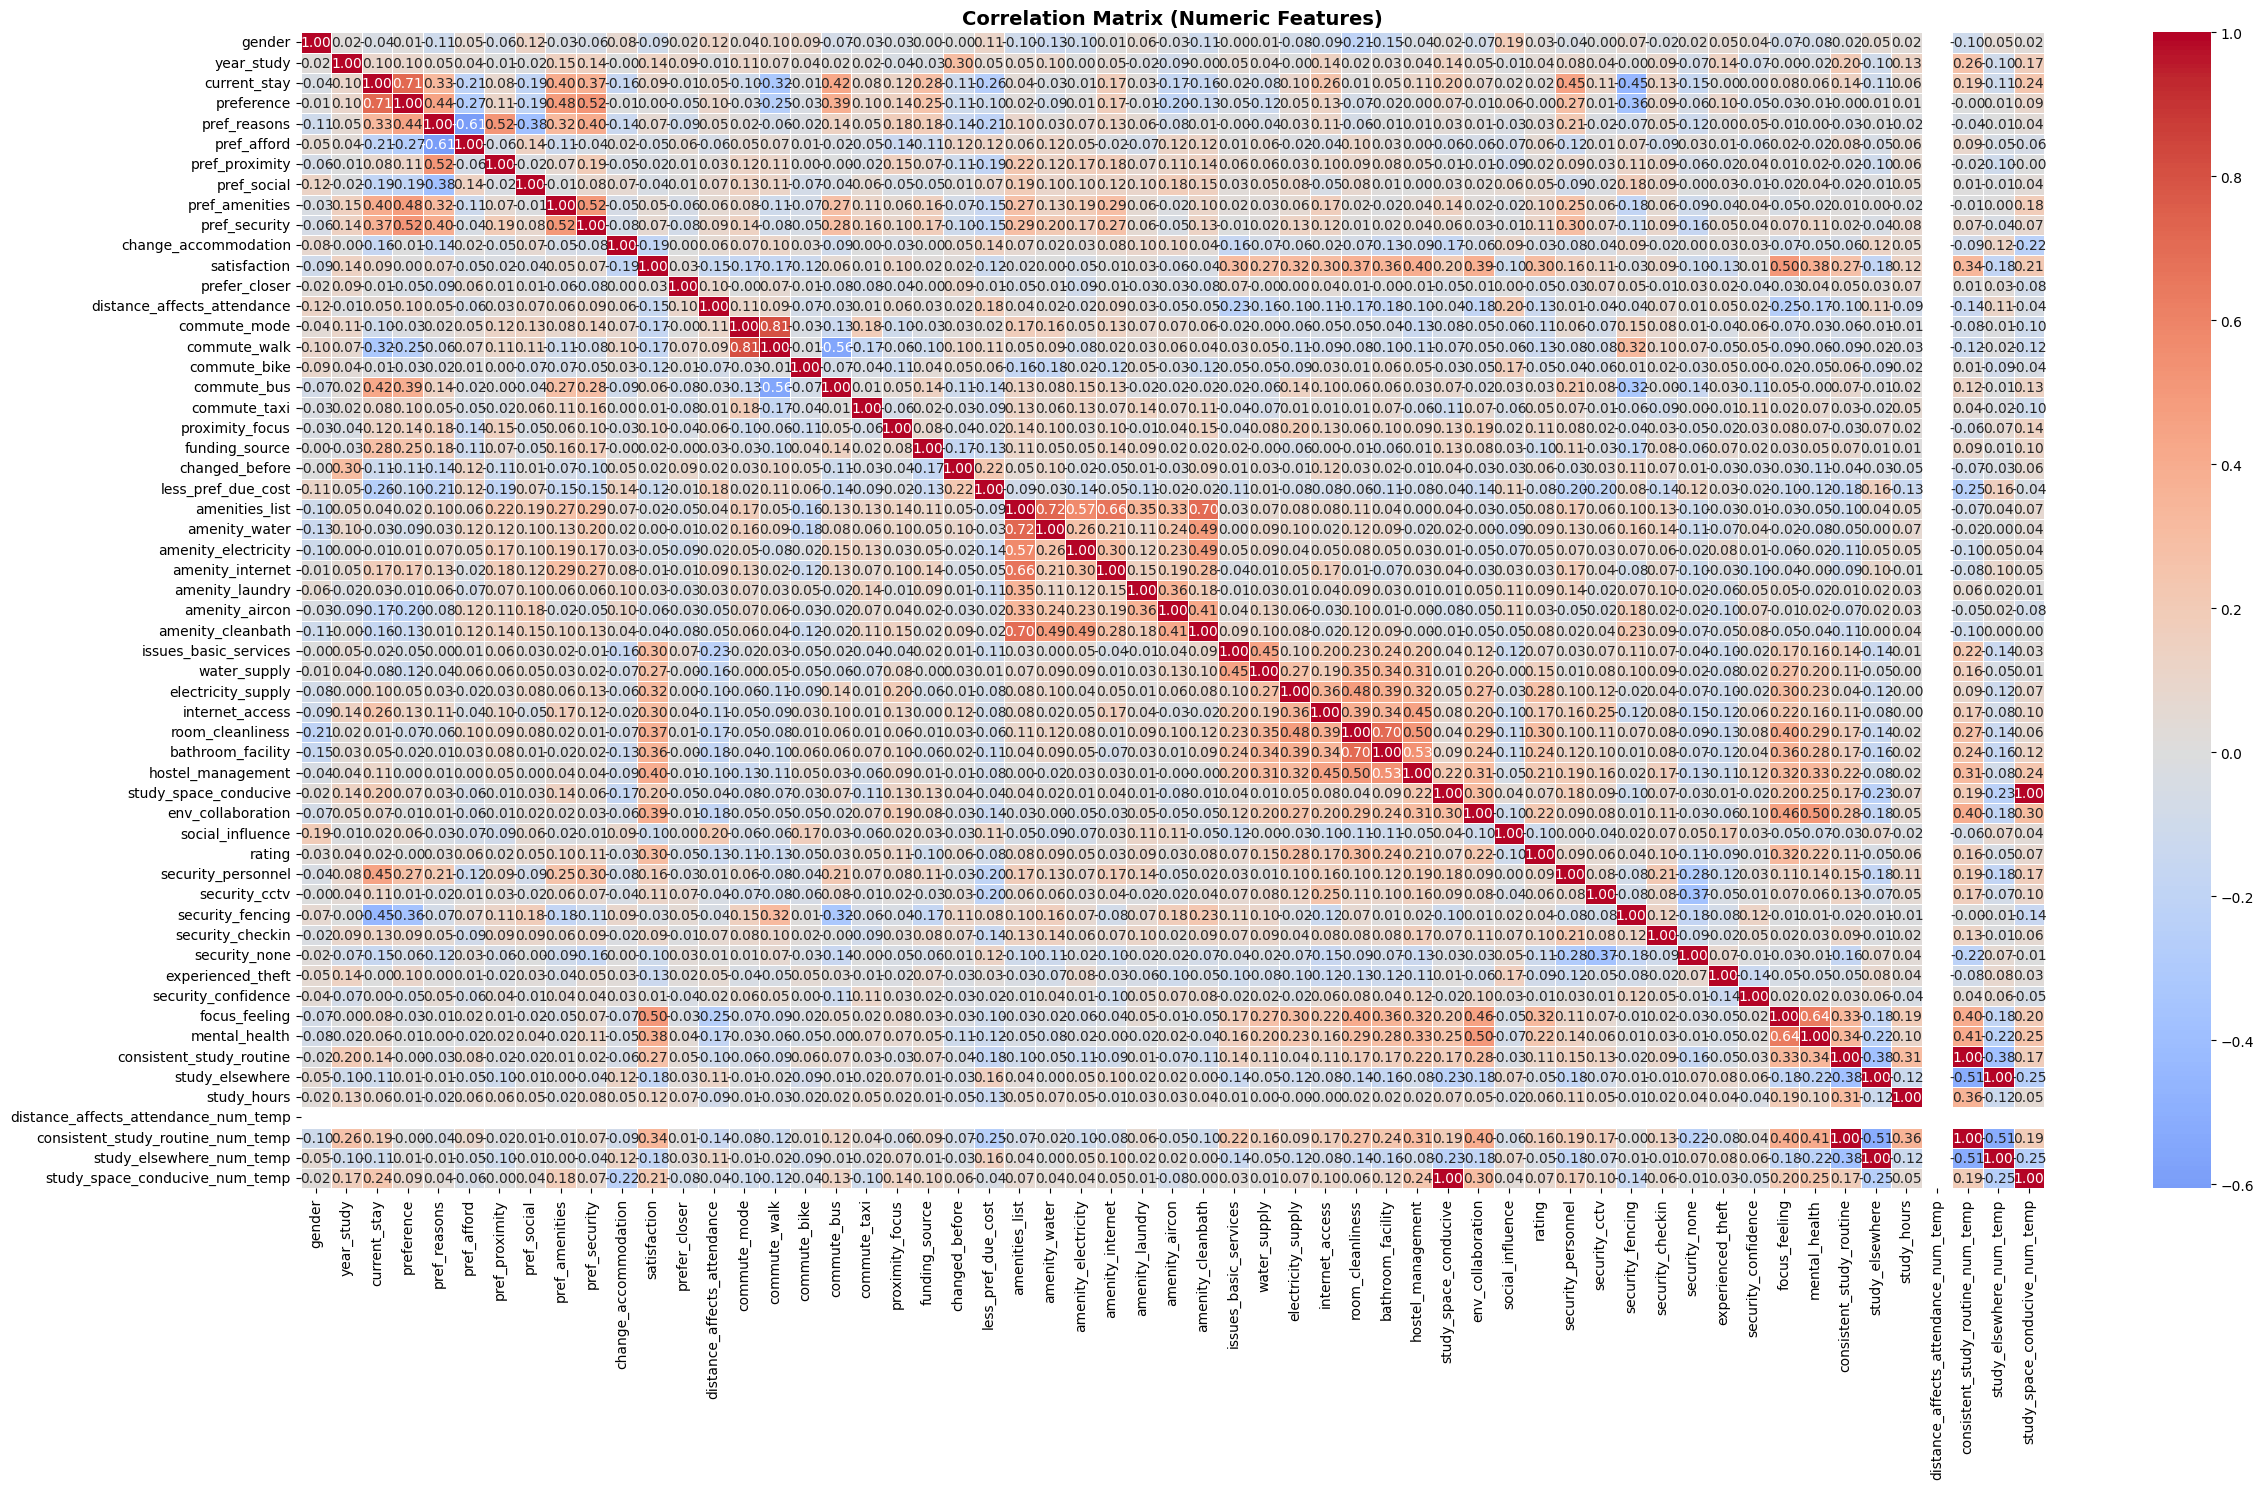

In [39]:
# Select only numeric columns
numeric_df = df_encoded.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr(method='pearson')  # or 'spearman'

# Plot
plt.figure(figsize=(25, 15))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title("Correlation Matrix (Numeric Features)", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


In [43]:
import pandas as pd

# Get correlations with current_stay
stay_corr = corr['current_stay'].drop('current_stay').sort_values(ascending=False)

# Separate into pull and push factors
pull_factors = stay_corr[stay_corr > 0].sort_values(ascending=False)
push_factors = stay_corr[stay_corr < 0].sort_values()  # smallest (most negative) first

# Convert to DataFrames for nice table display
pull_df = pd.DataFrame({
    'Feature': pull_factors.index,
    'Correlation': pull_factors.values
}).reset_index(drop=True)

push_df = pd.DataFrame({
    'Feature': push_factors.index,
    'Correlation': push_factors.values
}).reset_index(drop=True)

print("📌 Pull Factors (associated with staying ON-campus):")
display(pull_df)

print("\n📌 Push Factors (associated with staying OFF-campus):")
display(push_df)

📌 Pull Factors (associated with staying ON-campus):


,Feature,Correlation
0,preference,0.712995
1,security_personnel,0.452360
2,commute_bus,0.423142
3,pref_amenities,0.400753
4,pref_security,0.371503
5,pref_reasons,0.328019
6,funding_source,0.281584
7,internet_access,0.256347
8,study_space_conducive_num_temp,0.239350
9,study_space_conducive,0.196728



📌 Push Factors (associated with staying OFF-campus):


,Feature,Correlation
0,security_fencing,-0.448079
1,commute_walk,-0.321476
2,less_pref_due_cost,-0.257177
3,pref_afford,-0.206808
4,pref_social,-0.188427
5,amenity_aircon,-0.170790
6,change_accommodation,-0.159248
7,amenity_cleanbath,-0.159177
8,security_none,-0.149412
9,changed_before,-0.112834


,gender,Count,Percentage
0,Male,246,61.5
1,Female,154,38.5


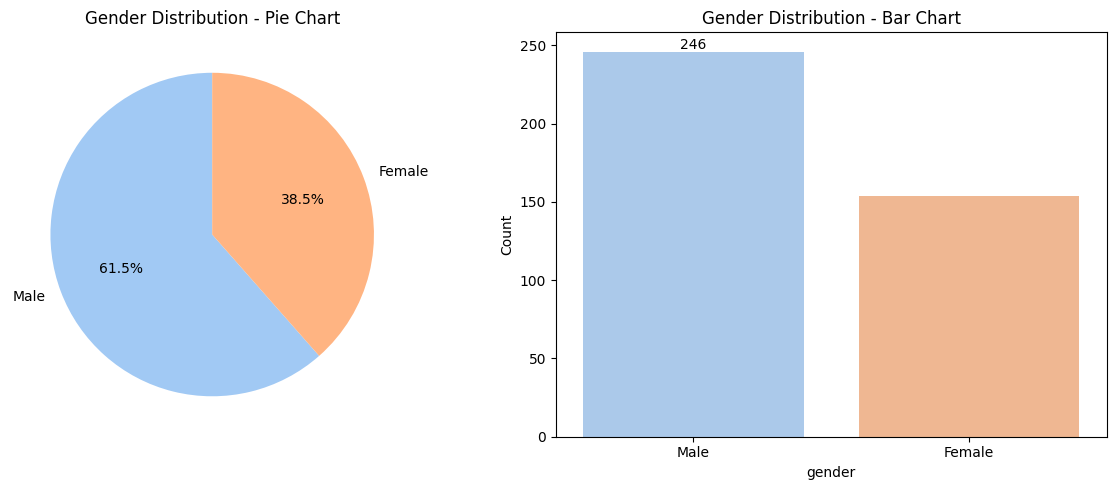

,year_study,Count,Percentage
0,4,138,34.50
1,2,99,24.75
2,3,97,24.25
3,1,59,14.75
4,5,6,1.50
5,6,1,0.25


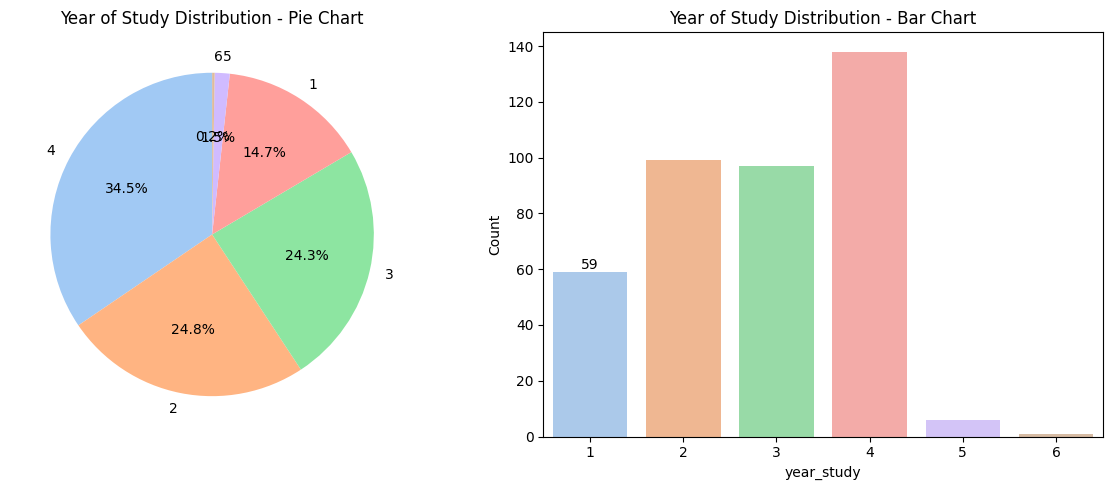

,current_stay,Count,Percentage
0,Off-Campus,220,55.0
1,On-Campus,180,45.0


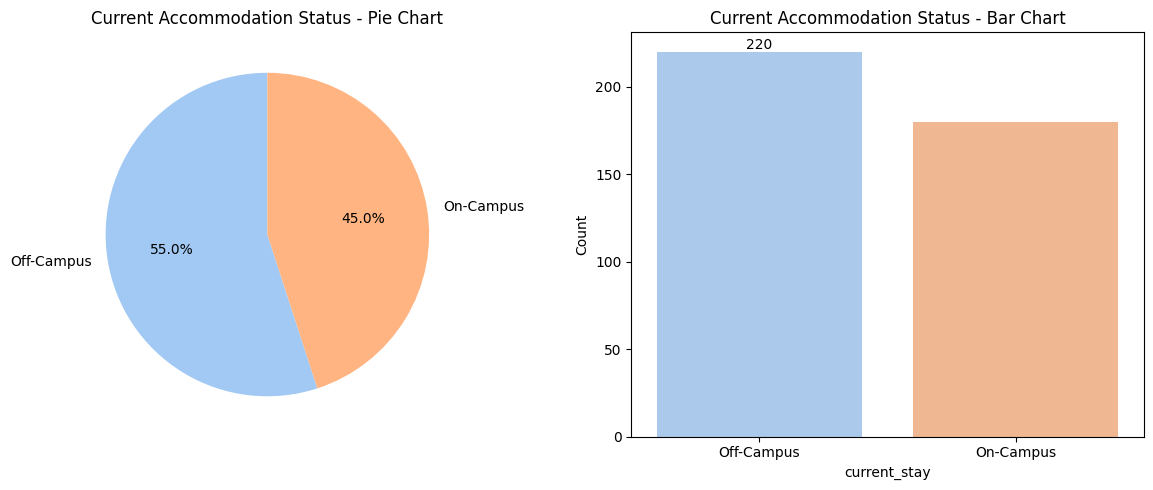

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to make frequency table & charts
def freq_table_and_charts(df, column, title):
    # Frequency table
    freq_table = df[column].value_counts().reset_index()
    freq_table.columns = [column, 'Count']
    freq_table['Percentage'] = (freq_table['Count'] / len(df) * 100).round(2)
    display(freq_table)

    # Plot side-by-side pie and bar chart
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Pie chart
    axes[0].pie(
        freq_table['Count'],
        labels=freq_table[column],
        autopct='%1.1f%%',
        startangle=90,
        colors=sns.color_palette('pastel')[0:len(freq_table)]
    )
    axes[0].set_title(f'{title} - Pie Chart')

    # Bar chart
    sns.barplot(
        data=freq_table,
        x=column,
        y='Count',
        ax=axes[1],
        palette='pastel'
    )
    axes[1].set_title(f'{title} - Bar Chart')
    axes[1].bar_label(axes[1].containers[0])

    plt.tight_layout()
    plt.show()

# Gender
freq_table_and_charts(df, 'gender', 'Gender Distribution')

# Year of Study
freq_table_and_charts(df, 'year_study', 'Year of Study Distribution')

# Current Accommodation Status
freq_table_and_charts(df, 'current_stay', 'Current Accommodation Status')


,Preference,Count,Percentage
0,On-campus hostel,221,55.25
1,Off-campus hostel,179,44.75


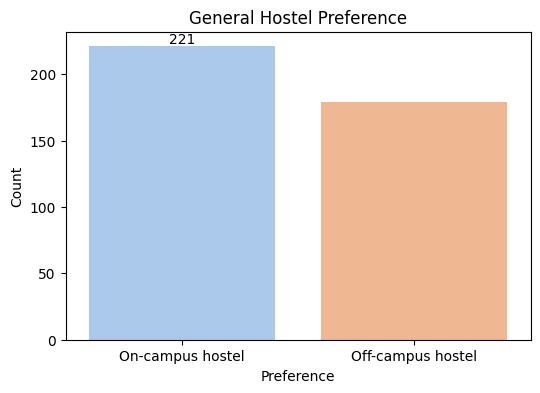

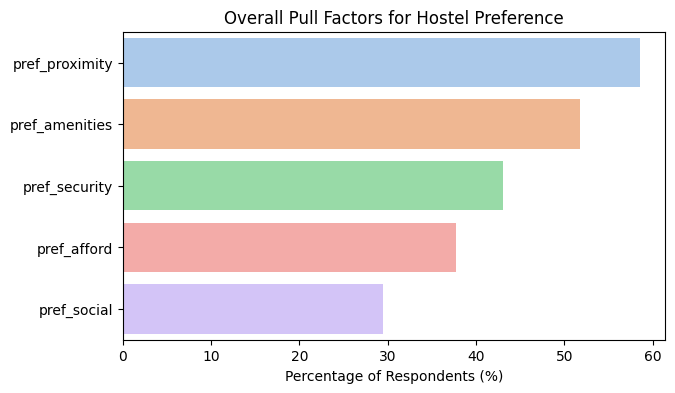

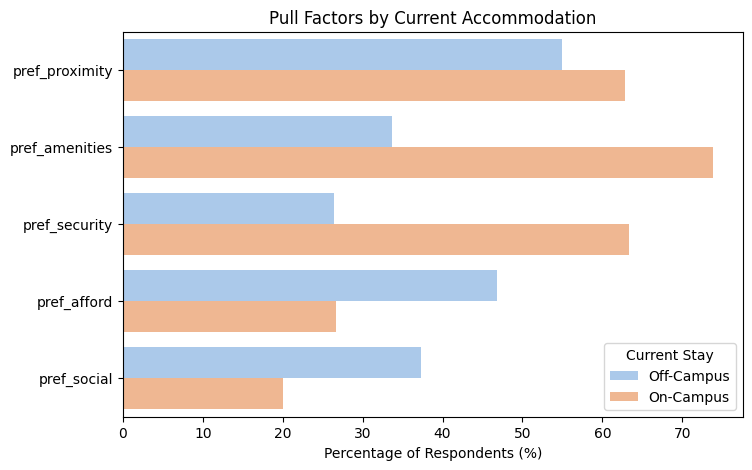

In [49]:
# 1️⃣ General Hostel Preference
pref_table = df['preference'].value_counts().reset_index()
pref_table.columns = ['Preference', 'Count']
pref_table['Percentage'] = (pref_table['Count'] / len(df) * 100).round(2)
display(pref_table)

plt.figure(figsize=(6, 4))
sns.barplot(data=pref_table, x='Preference', y='Count', palette='pastel')
plt.title('General Hostel Preference')
plt.bar_label(plt.gca().containers[0])
plt.show()

# 2️⃣ Pull factors selection rates (overall)
pull_cols = ['pref_proximity', 'pref_amenities', 'pref_security', 'pref_afford', 'pref_social']
pull_df = df[pull_cols].mean().sort_values(ascending=False) * 100  # percentage selecting each factor
pull_df = pull_df.reset_index()
pull_df.columns = ['Pull Factor', 'Percentage']

plt.figure(figsize=(7, 4))
sns.barplot(data=pull_df, x='Percentage', y='Pull Factor', palette='pastel')
plt.title('Overall Pull Factors for Hostel Preference')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('')
plt.show()

# 3️⃣ Pull factors comparison between on-campus and off-campus
pull_comp = df.groupby('current_stay')[pull_cols].mean().T * 100
pull_comp.columns.name = None  # cleaner column name
pull_comp = pull_comp.reset_index().melt(id_vars='index', var_name='Current Stay', value_name='Percentage')
pull_comp.rename(columns={'index': 'Pull Factor'}, inplace=True)

plt.figure(figsize=(8, 5))
sns.barplot(data=pull_comp, x='Percentage', y='Pull Factor', hue='Current Stay', palette='pastel')
plt.title('Pull Factors by Current Accommodation')
plt.xlabel('Percentage of Respondents (%)')
plt.ylabel('')
plt.legend(title='Current Stay')
plt.show()

Likert variables detected: ['satisfaction', 'proximity_focus', 'water_supply', 'electricity_supply', 'internet_access', 'room_cleanliness', 'bathroom_facility', 'hostel_management', 'env_collaboration', 'rating', 'focus_feeling', 'mental_health']


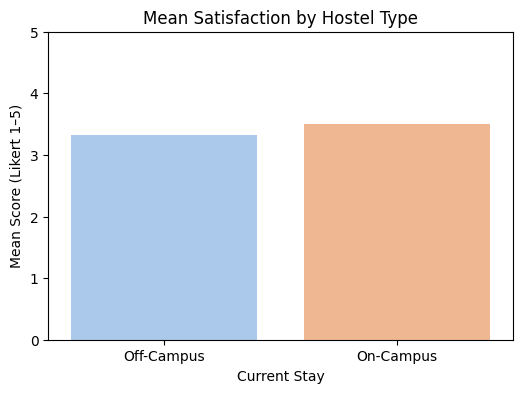

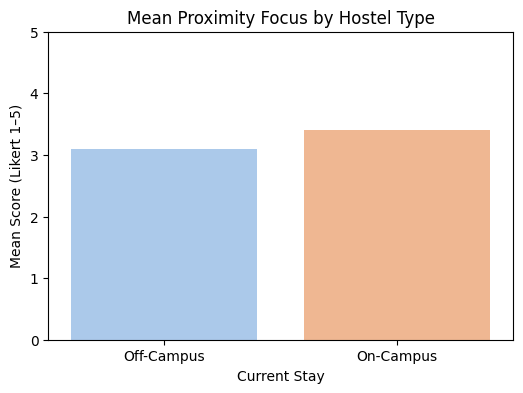

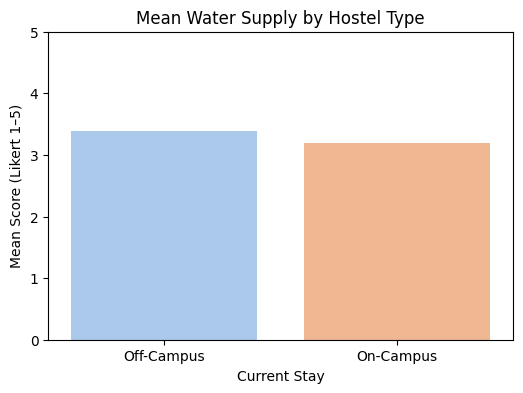

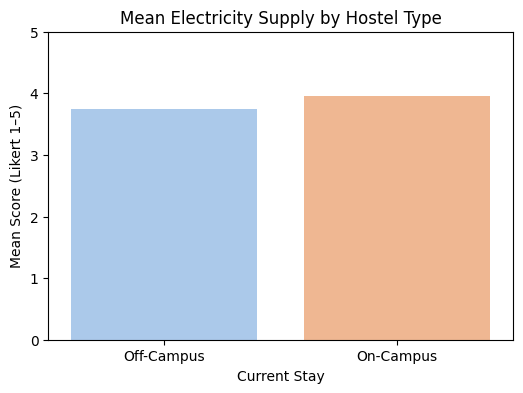

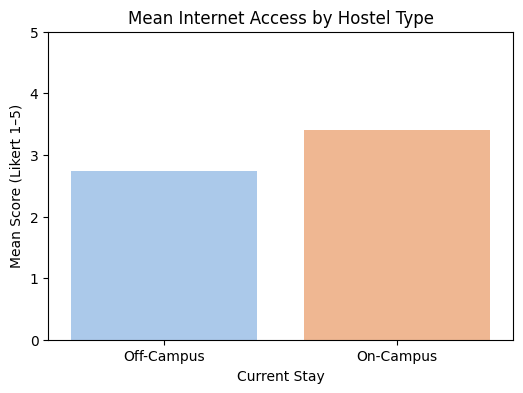

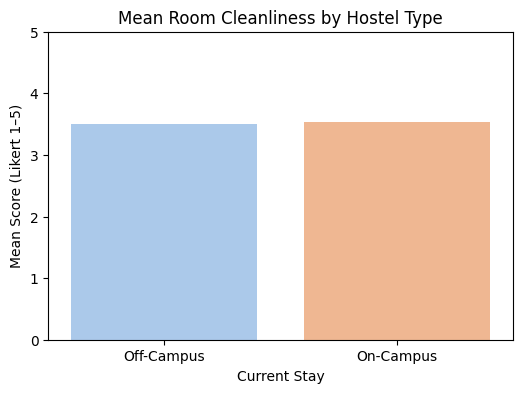

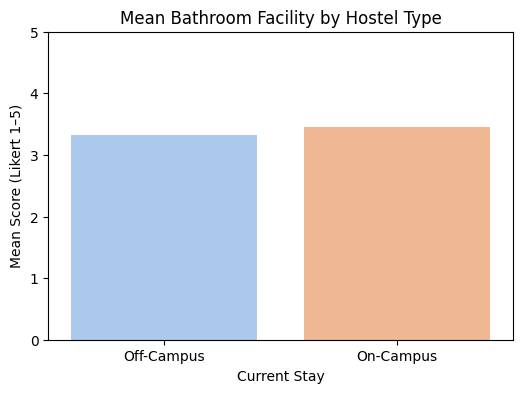

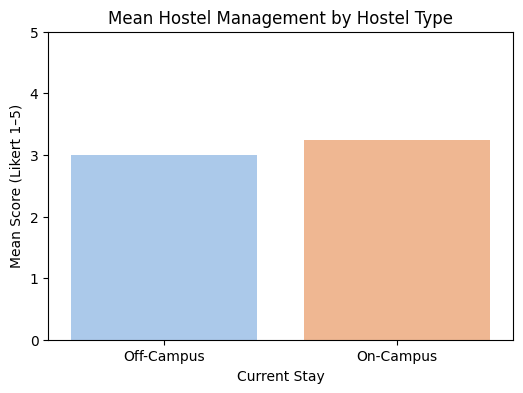

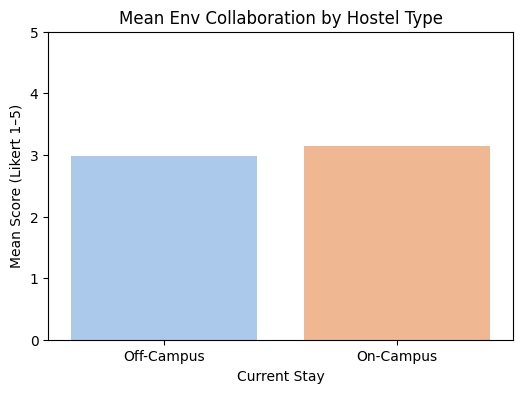

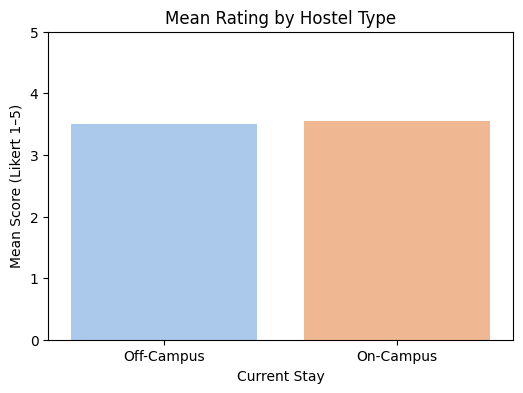

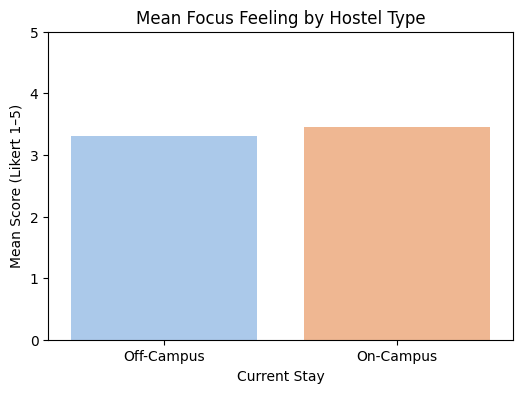

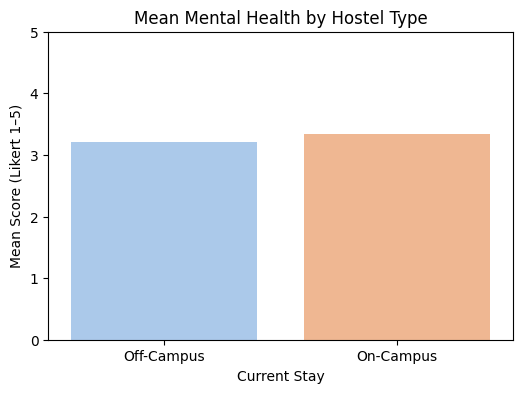

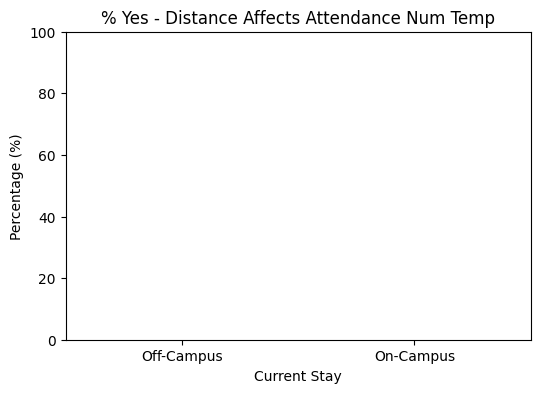

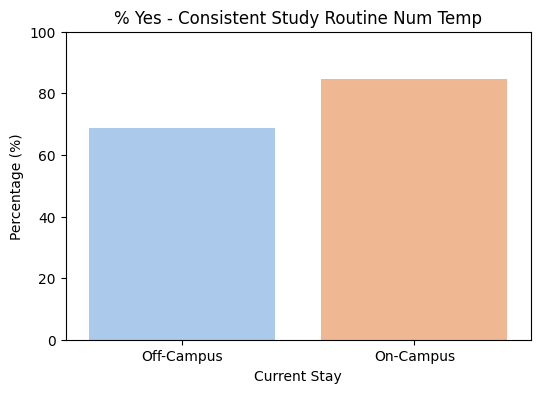

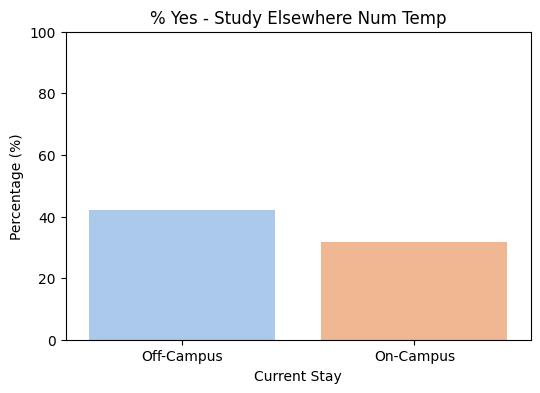

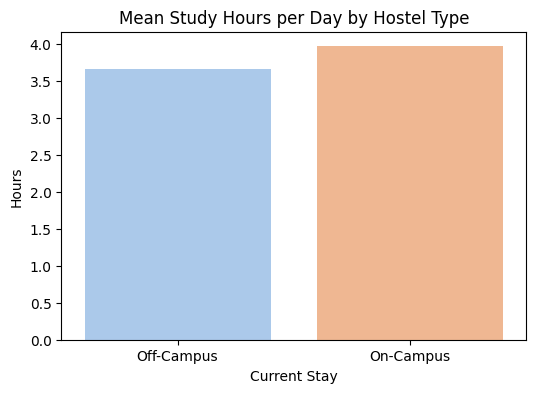

,satisfaction,proximity_focus,water_supply,electricity_supply,internet_access,room_cleanliness,bathroom_facility,hostel_management,env_collaboration,rating,focus_feeling,mental_health,distance_affects_attendance_num_temp,consistent_study_routine_num_temp,study_elsewhere_num_temp,study_hours
current_stay,,,,,,,,,,,,,,,,
Off-Campus,3.32,3.10,3.39,3.75,2.74,3.50,3.33,2.99,2.99,3.50,3.31,3.20,NaN,0.69,0.42,3.66
On-Campus,3.50,3.41,3.19,3.96,3.40,3.53,3.46,3.25,3.14,3.56,3.46,3.33,NaN,0.85,0.32,3.97


In [52]:
# Identify Likert scale columns (numeric, range 1–5)
likert_vars = [
    col for col in df.columns
    if df[col].dtype in ['int64', 'float64']
    and df[col].min() >= 1
    and df[col].max() <= 5
]

print("Likert variables detected:", likert_vars)

# Plot each Likert variable's mean by current_stay
for var in likert_vars:
    plt.figure(figsize=(6,4))
    sns.barplot(
        data=df,
        x='current_stay',
        y=var,
        palette='pastel',
        ci=None
    )
    plt.title(f'Mean {var.replace("_", " ").title()} by Hostel Type')
    plt.ylabel('Mean Score (Likert 1–5)')
    plt.xlabel('Current Stay')
    plt.ylim(0,5)
    plt.show()


# 2️⃣ Categorical Yes/No variables: percentage comparison
for var in categorical_vars:
    cat_summary = df.groupby('current_stay')[var].mean().reset_index()
    cat_summary[var] = cat_summary[var] * 100

    plt.figure(figsize=(6,4))
    sns.barplot(
        data=cat_summary,
        x='current_stay',
        y=var,
        palette='pastel'
    )
    plt.title(f'% Yes - {var.replace("_", " ").title()}')
    plt.ylabel('Percentage (%)')
    plt.xlabel('Current Stay')
    plt.ylim(0,100)
    plt.show()

# 3️⃣ Study hours: mean comparison
plt.figure(figsize=(6,4))
sns.barplot(
    data=df,
    x='current_stay',
    y='study_hours',
    palette='pastel',
    ci=None
)
plt.title('Mean Study Hours per Day by Hostel Type')
plt.ylabel('Hours')
plt.xlabel('Current Stay')
plt.show()

# 4️⃣ Optional: Combined table for reporting
summary_stats = df.groupby('current_stay')[likert_vars + categorical_vars + numeric_vars].mean().round(2)
display(summary_stats)

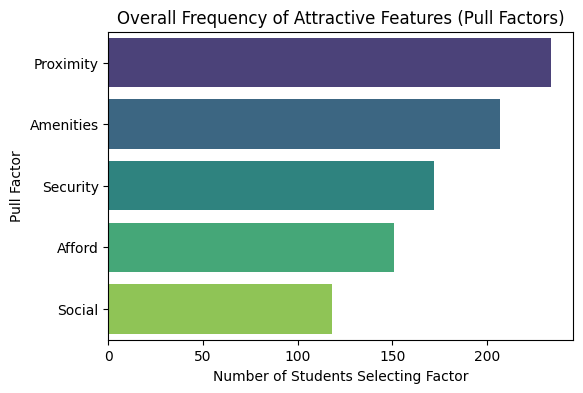

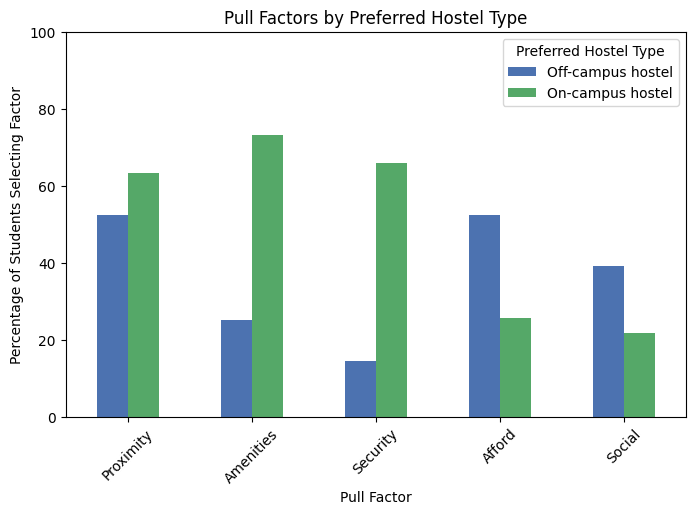

In [53]:
# Pull factor columns
pull_factor_cols = [
    'pref_proximity', 'pref_amenities', 'pref_security',
    'pref_afford', 'pref_social'
]

# 1. Overall frequency of pull factors
pull_counts = df[pull_factor_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(
    x=pull_counts.values,
    y=pull_counts.index.str.replace('pref_', '').str.title(),
    palette='viridis'
)
plt.title("Overall Frequency of Attractive Features (Pull Factors)")
plt.xlabel("Number of Students Selecting Factor")
plt.ylabel("Pull Factor")
plt.show()

# 2. Split by preferred hostel type
pull_by_pref = df.groupby('preference')[pull_factor_cols].mean().T

# Convert proportions to percentages
pull_by_pref = pull_by_pref * 100
pull_by_pref.index = pull_by_pref.index.str.replace('pref_', '').str.title()

# Plot grouped bar chart
pull_by_pref.plot(
    kind='bar',
    figsize=(8,5),
    color=['#4C72B0', '#55A868']
)
plt.title("Pull Factors by Preferred Hostel Type")
plt.ylabel("Percentage of Students Selecting Factor")
plt.xlabel("Pull Factor")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.legend(title="Preferred Hostel Type")
plt.show()

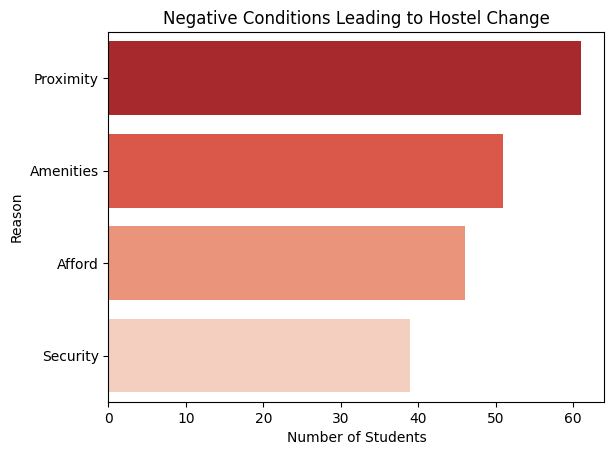

In [58]:
change_cols = ['pref_afford', 'pref_proximity', 'pref_amenities', 'pref_security']
change_reason_counts = df[df['change_accommodation'] == 'Yes'][change_cols].sum().sort_values(ascending=False)

sns.barplot(
    x=change_reason_counts.values,
    y=change_reason_counts.index.str.replace('pref_', '').str.title(),
    palette="Reds_r"
)
plt.title("Negative Conditions Leading to Hostel Change")
plt.xlabel("Number of Students")
plt.ylabel("Reason")
plt.show()

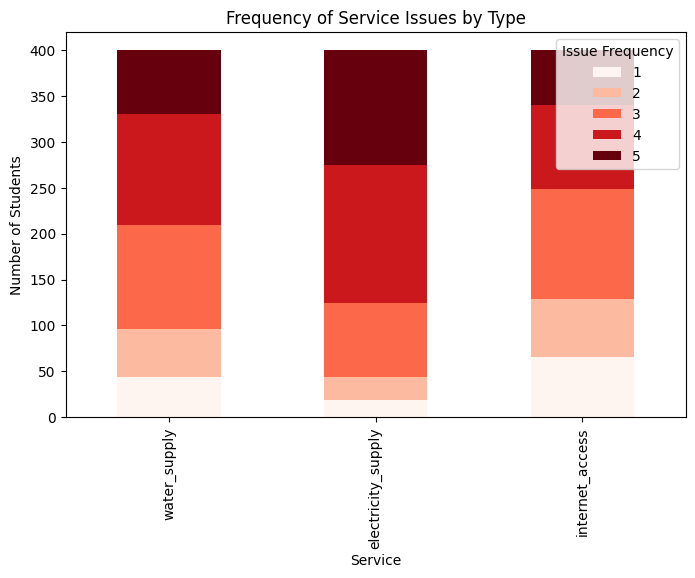

In [59]:
issue_cols = ['water_supply', 'electricity_supply', 'internet_access']
issue_counts = df[issue_cols].apply(lambda x: x.value_counts()).fillna(0)

issue_counts.T.plot(kind='bar', stacked=True, figsize=(8,5), colormap='Reds')
plt.title("Frequency of Service Issues by Type")
plt.xlabel("Service")
plt.ylabel("Number of Students")
plt.legend(title="Issue Frequency")
plt.show()

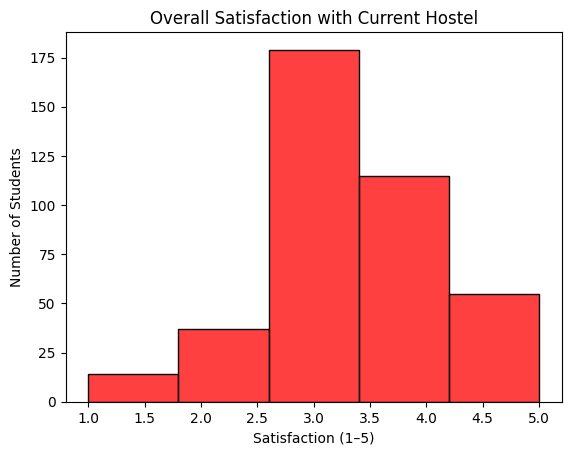

In [60]:
sns.histplot(df['satisfaction'], bins=5, kde=False, color="red")
plt.title("Overall Satisfaction with Current Hostel")
plt.xlabel("Satisfaction (1–5)")
plt.ylabel("Number of Students")
plt.show()

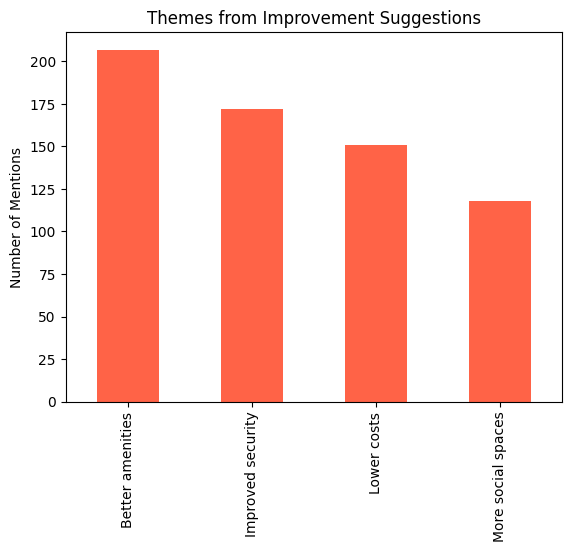

In [61]:
# Example keyword mapping
themes = {
    "Better amenities": ["wifi", "internet", "laundry", "water", "electricity"],
    "Lower costs": ["afford", "expensive", "cost", "price", "cheap"],
    "Improved security": ["security", "safe", "safety", "theft"],
    "More social spaces": ["social", "friends", "community", "events"],
}

improvements = df['pref_reasons'].dropna().str.lower()

theme_counts = {theme: sum(improvements.str.contains('|'.join(keywords))) 
                for theme, keywords in themes.items()}

pd.Series(theme_counts).sort_values(ascending=False).plot(kind='bar', color="tomato")
plt.title("Themes from Improvement Suggestions")
plt.ylabel("Number of Mentions")
plt.show()

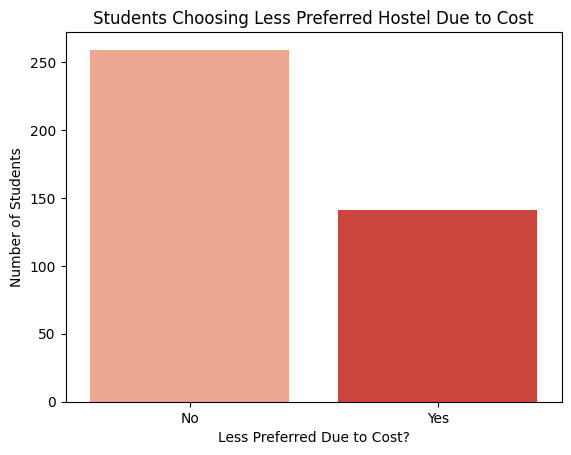

In [62]:
sns.countplot(x='less_pref_due_cost', data=df, palette="Reds")
plt.title("Students Choosing Less Preferred Hostel Due to Cost")
plt.xlabel("Less Preferred Due to Cost?")
plt.ylabel("Number of Students")
plt.show()

                  Mean  Median  Mode
current_stay                        
Off-Campus    3.318182     3.0     3
On-Campus     3.500000     4.0     3


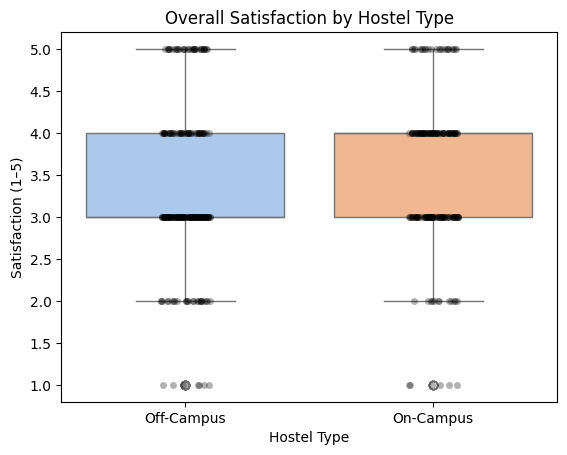

In [63]:
# Mean, median, mode
overall_stats = df.groupby('current_stay')['satisfaction'].agg(['mean', 'median', lambda x: x.mode()[0]])
overall_stats.columns = ['Mean', 'Median', 'Mode']
print(overall_stats)

# Visualization
sns.boxplot(data=df, x='current_stay', y='satisfaction', palette="pastel")
sns.stripplot(data=df, x='current_stay', y='satisfaction', color='black', alpha=0.3)
plt.title("Overall Satisfaction by Hostel Type")
plt.ylabel("Satisfaction (1–5)")
plt.xlabel("Hostel Type")
plt.show()

In [64]:
detail_vars = [
    'water_supply', 'electricity_supply', 'internet_access',
    'room_cleanliness', 'bathroom_facility', 'hostel_management'
]

detail_means = df.groupby('current_stay')[detail_vars].mean().T
print(detail_means)

current_stay        Off-Campus  On-Campus
water_supply          3.386364   3.188889
electricity_supply    3.745455   3.961111
internet_access       2.740909   3.400000
room_cleanliness      3.500000   3.527778
bathroom_facility     3.327273   3.455556
hostel_management     2.990909   3.250000


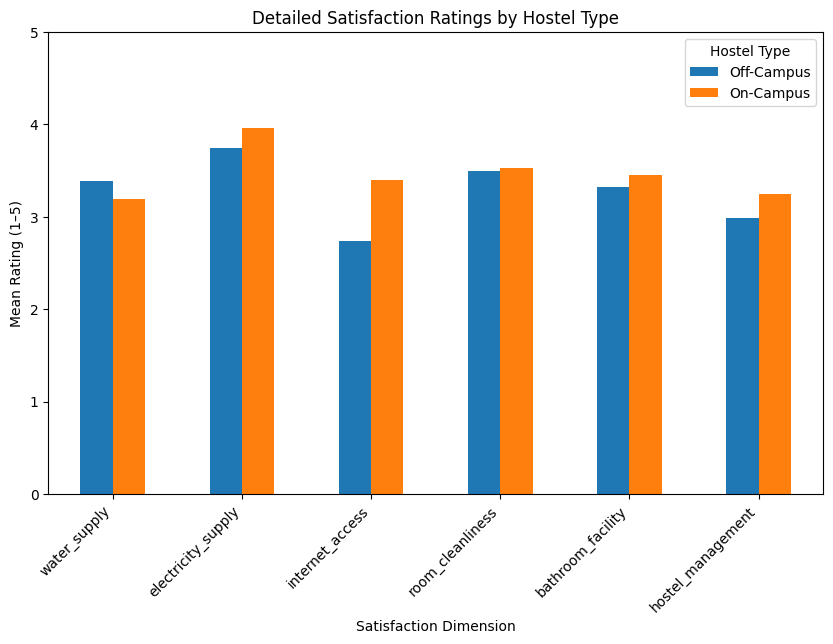

In [65]:
detail_means.plot(kind='bar', figsize=(10,6))
plt.title("Detailed Satisfaction Ratings by Hostel Type")
plt.ylabel("Mean Rating (1–5)")
plt.xlabel("Satisfaction Dimension")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Hostel Type")
plt.ylim(0,5)
plt.show()

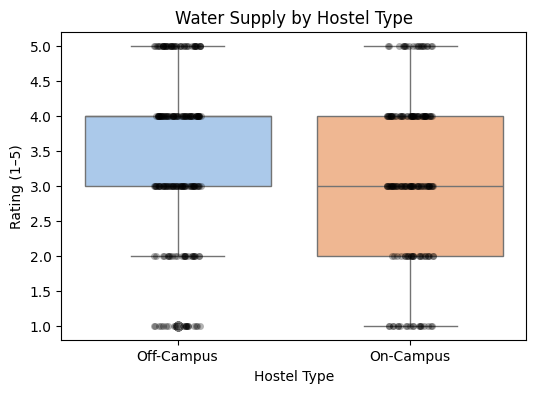

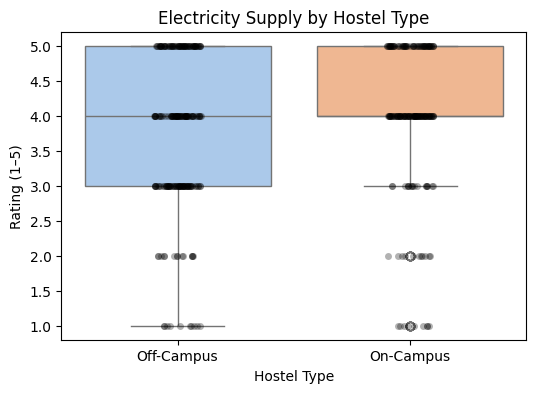

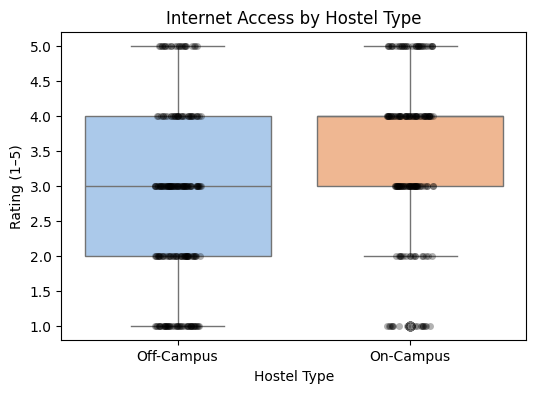

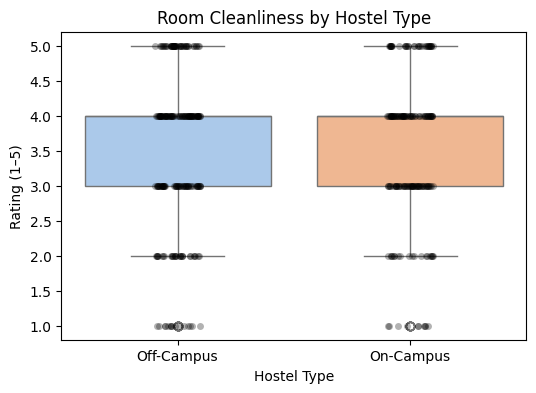

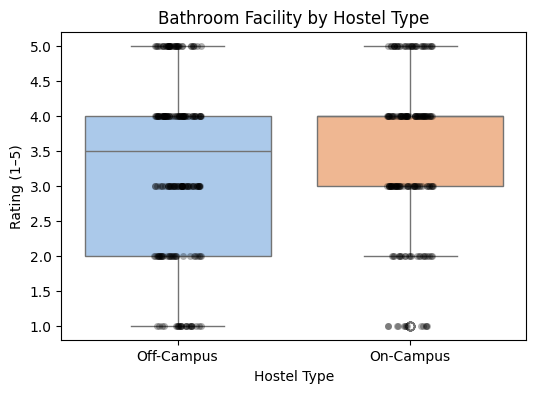

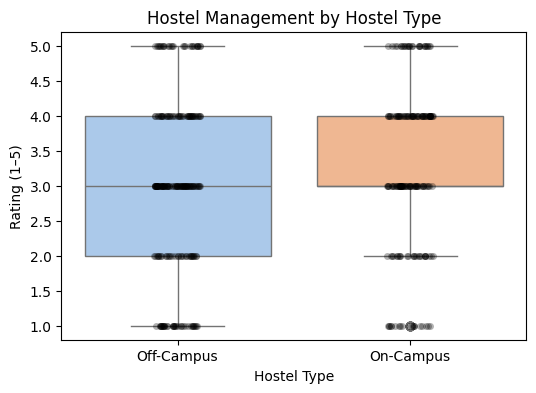

In [66]:
for var in detail_vars:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='current_stay', y=var, palette="pastel")
    sns.stripplot(data=df, x='current_stay', y=var, color='black', alpha=0.3)
    plt.title(f"{var.replace('_',' ').title()} by Hostel Type")
    plt.ylabel("Rating (1–5)")
    plt.xlabel("Hostel Type")
    plt.show()

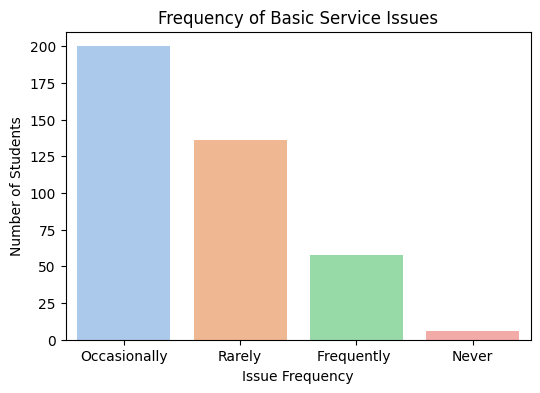

In [67]:
# Frequency counts for general issues
issue_counts = df['issues_basic_services'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=issue_counts.index, y=issue_counts.values, palette="pastel")
plt.title("Frequency of Basic Service Issues")
plt.ylabel("Number of Students")
plt.xlabel("Issue Frequency")
plt.show()

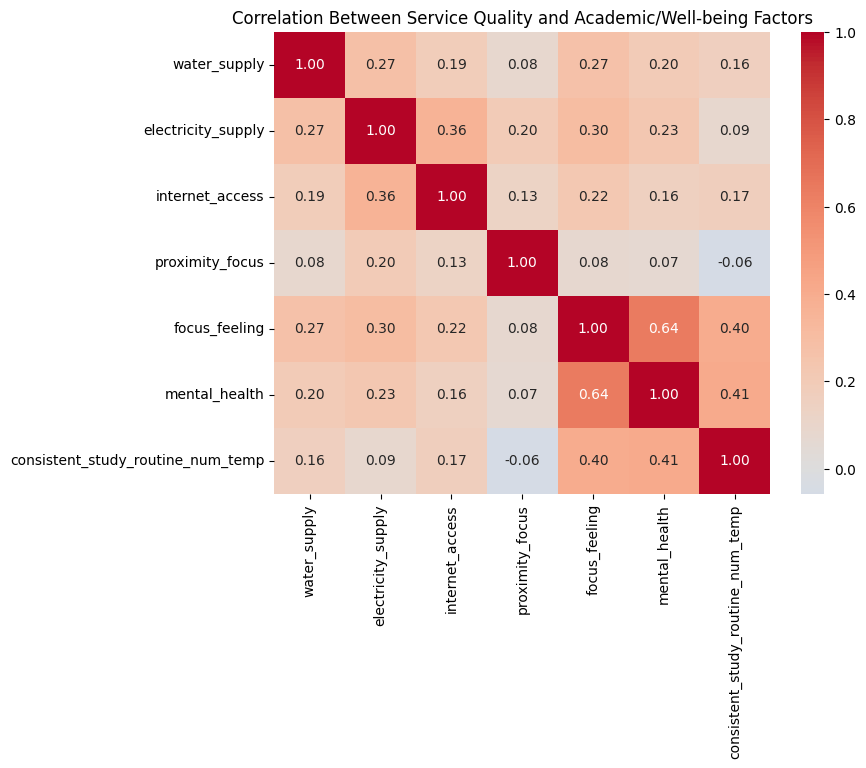

In [68]:
service_vars = ['water_supply', 'electricity_supply', 'internet_access']
academic_vars = ['proximity_focus', 'focus_feeling', 'mental_health', 'consistent_study_routine_num_temp']

corr_df = df[service_vars + academic_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Correlation Between Service Quality and Academic/Well-being Factors")
plt.show()

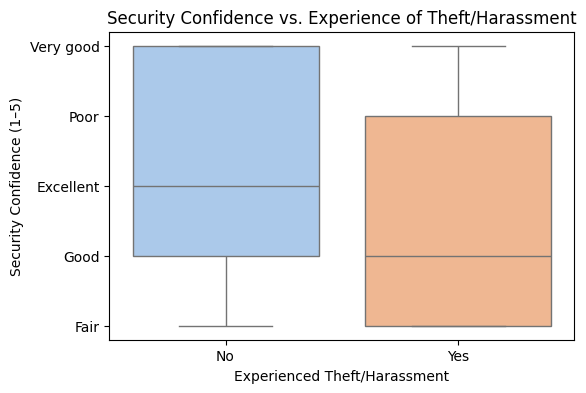

In [69]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='experienced_theft', y='security_confidence', palette="pastel")
plt.title("Security Confidence vs. Experience of Theft/Harassment")
plt.ylabel("Security Confidence (1–5)")
plt.xlabel("Experienced Theft/Harassment")
plt.show()

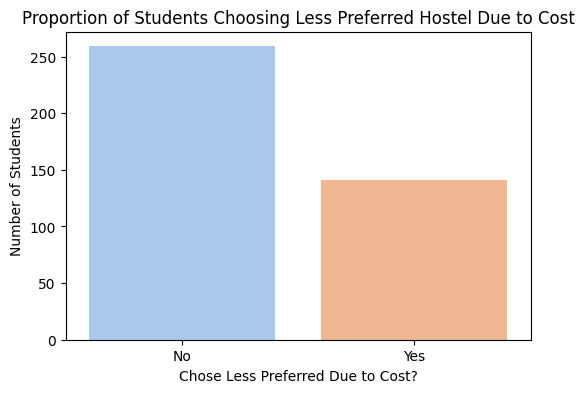

In [70]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='less_pref_due_cost', palette="pastel")
plt.title("Proportion of Students Choosing Less Preferred Hostel Due to Cost")
plt.xlabel("Chose Less Preferred Due to Cost?")
plt.ylabel("Number of Students")
plt.show()